In [1]:
# ! curl https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
# ! curl https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh


In [2]:
# !powershell Expand-Archive -Path "C:/Users/laksh/Downloads/padel.zip" -DestinationPath "C:/Users/laksh/Downloads"


In [56]:

import pandas as pd
df3 = pd.read_csv('C:/Users/laksh/Documents/DM_PROJECT/Coronavirus/cv_bioactivity_data_pic50.csv')
df3.shape

(133, 8)

In [70]:
selection = ['canonical_smiles','molecule_chembl_id','bioactivity_class','MolWt','MolLogP',"NumHDonors",'NumHAcceptors','pIC50']
selection2=['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df4_selection=df3[selection2]
df4_selection.to_csv('C:/Users/laksh/Documents/DM_PROJECT/Acetyl/ace_molecule.smi', sep='\t', index=False, header=False)
df4_selection

,canonical_smiles,molecule_chembl_id
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478
...,...,...
7223,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,CHEMBL5072428
7224,Nc1c2c(nc3ccccc13)CCCC2,CHEMBL95
7225,Nc1c2c(nc3cc(Cl)ccc13)CCCC2,CHEMBL292314
7226,COc1ccc2nc3c(c(N)c2c1)CCCC3,CHEMBL1256415


In [44]:
# ! type molecule.smi

In [25]:
# !find /c /v "" molecule.smi

#C:\Users\laksh\Downloads\PaDEL-Descriptor>java -jar Padel-Descriptor.jar => run in cmd


---------- MOLECULE.SMI: 133


# Preparing X and Y data Matrices

In [57]:
#X data matrix
df_desc_X=pd.read_csv('C:/Users/laksh/Documents/DM_PROJECT/Coronavirus/cv_molecule_descriptor.csv')


df_desc_X=df_desc_X.drop(columns=["Name"])
df_desc_X.shape



(133, 881)

In [58]:
#y data matrix
df_desc_Y=df3["pIC50"]
df_desc_Y.shape

(133,)

In [59]:
#combining X and Y matrices.
dataset_mb=pd.concat([df_desc_X,df_desc_Y],axis=1)

In [69]:
dataset_mb.to_csv('C:/Users/laksh/Documents/DM_PROJECT/Coronavirus/cv_bioactivity_data_3class_pic50_pubchem_fp.csv')

# PART -B Model Building

In [60]:
df_mb = pd.read_csv('C:/Users/laksh/Documents/DM_PROJECT/Coronavirus/cv_bioactivity_data_3class_pic50_pubchem_fp.csv')
df_mb.head()

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.14
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.03
2,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.87
3,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.88
4,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.70


In [61]:
#Defining X and Y values

#input features
X=df_mb.drop(columns=['pIC50'],axis=1)
#output features
Y=df_mb.pIC50
print(X.shape,Y.shape)
print(Y)

(133, 882) (133,)
0     5.14
1     5.03
2     4.87
3     4.88
4     5.70
      ... 
128   4.97
129   5.00
130   4.94
131   4.97
132   4.10
Name: pIC50, Length: 133, dtype: float64


In [62]:
#Handling Missing values of X
X = X.dropna()
Y = Y.drop(Y.index.difference(X.index))
print(X.shape,Y.shape)

(133, 882) (133,)


In [63]:
#Checkign for missing values in X and Y
print("X",X.isnull().sum())
print("Y",Y.isnull().sum())

X Unnamed: 0      0
PubchemFP0      0
PubchemFP1      0
PubchemFP2      0
PubchemFP3      0
               ..
PubchemFP876    0
PubchemFP877    0
PubchemFP878    0
PubchemFP879    0
PubchemFP880    0
Length: 882, dtype: int64
Y 0


In [64]:
#replacing missing valules
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
X1=X
Y1=Y.values.reshape(-1,1)
print(X1.shape,Y1.shape)
imp.fit(X1)
imp.fit(Y1)

(133, 882) (133, 1)


SimpleImputer()

In [65]:
imp.transform(Y1)
Y1_new=Y1.flatten()
y1df=pd.DataFrame(Y1_new)
Y2=y1df.fillna(0)
Y2

Y2.shape



(133, 1)

In [66]:
# imp.transform(X1)
# X1_new=X1.flatten()
# x1df=pd.DataFrame(X1_new)
# X2=x1df.fillna(0)
X1.shape

(133, 882)

In [67]:
#Remove low variance features

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X1 = selection.fit_transform(X)
X1.shape

(133, 201)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y2, test_size=0.2,random_state=42)
print("train set:",X_train.shape, Y_train.shape)
print("tests set:",X_test.shape, Y_test.shape)



train set: (106, 201) (106, 1)
tests set: (27, 201) (27, 1)


# Building a Regression Model using Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=1000)
Y_train_new=np.array(Y_train)
model.fit(X_train, Y_train_new.ravel())

#Accuracy of Model
rf = model.score(X_test, Y_test)
print("Accuracy of model:",rf)

#Predictions
Y_pred = model.predict(X_test)

# print(classification_report(Y_test, Y_pred)


Accuracy of model: 0.7429339542832915


# Building a Model Using Support Vector Regressor

In [72]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

np.random.seed(100)
model2 =make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
Y_train_new=np.array(Y_train)
model2.fit(X_train, Y_train_new.ravel())

#Accuracy of Model
svm_acc = model2.score(X_test, Y_test)
print("Accuracy of model:",svm_acc)


Accuracy of model: 0.6962614078816303


# Building a model using Gradient Boosting Regressor

In [71]:
#Gradient Boosting Regressor is a type of machine learning algorithm used for making predictions. 
#It works by building multiple decision trees in a sequential manner and combining them to make a final prediction.

from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(100)
model3 =GradientBoostingRegressor(random_state=0)
Y_train_new=np.array(Y_train)
model3.fit(X_train, Y_train_new.ravel())

#Accuracy of Model
gb_acc = model3.score(X_test,Y_test)
print("Accuracy of model:",gb_acc)

Accuracy of model: 0.7183238817371054


# Scatter Plot of Experimental vs Predicted pIC50 Values

<function matplotlib.pyplot.show(close=None, block=None)>

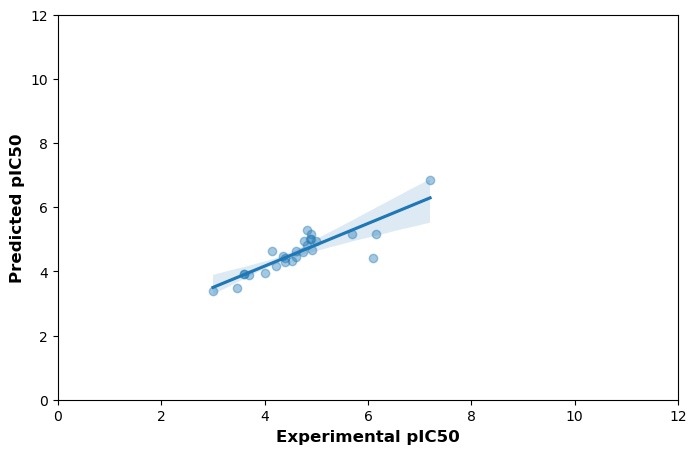

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# sns.set(color_codes=True)
# sns.set_style("white")

#,fit_reg=False
ax=sns.regplot(x=Y_test,y=Y_pred,scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(8, 5)
plt.show


# Confusion Matrix

In [65]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# cf_matrix = confusion_matrix(Y_test, Y_pred)
# sns.heatmap(cf_matrix, annot=True)

# PART C - Comparing Regressors

In [74]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)
     

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:16<00:00,  2.62it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:12<00:00,  3.43it/s]


In [75]:

# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,21488821444053550585530782607650917166081655451...,-1964692246313467583068360968607188402801608540...,129857064103330690556982684891711872780206080.00,0.26
KernelRidge,29.66,-25.20,4.74,0.23
QuantileRegressor,2.10,-0.00,0.93,0.17
Lasso,2.09,0.00,0.93,0.02
LarsCV,2.09,0.00,0.93,0.48
LassoLars,2.09,0.00,0.93,0.02
ElasticNet,2.09,0.00,0.93,0.21
DummyRegressor,2.09,0.00,0.93,0.01
LassoLarsCV,1.47,0.57,0.61,0.24


In [75]:
# from lazypredict.Supervised import LazyClassifier
# clf2 = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models2_test,predictions2_test = clf2.fit(X_train, X_test, Y_train, Y_test)
# predictions2_test

In [76]:

# Performance table of the test set (20% subset)
predictions_test
     

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,54573363660443668713920900329648281658253585847...,-3673207169452938938035741668766745757240919097...,53191501765590113340875059150250847985360002778...,0.12
LinearRegression,1367133209710553393528832.00,-9201858142282570732142592.00,2662301931600.29,0.02
TransformedTargetRegressor,1367133209710553393528832.00,-9201858142282570732142592.00,2662301931600.29,0.03
KernelRidge,5.60,-29.98,4.88,0.04
GaussianProcessRegressor,2.88,-11.68,3.13,0.04
QuantileRegressor,1.15,-0.03,0.89,0.13
LassoLars,1.15,-0.01,0.88,0.02
Lasso,1.15,-0.01,0.88,0.02
LarsCV,1.15,-0.01,0.88,0.29


[(0.0, 1.0)]

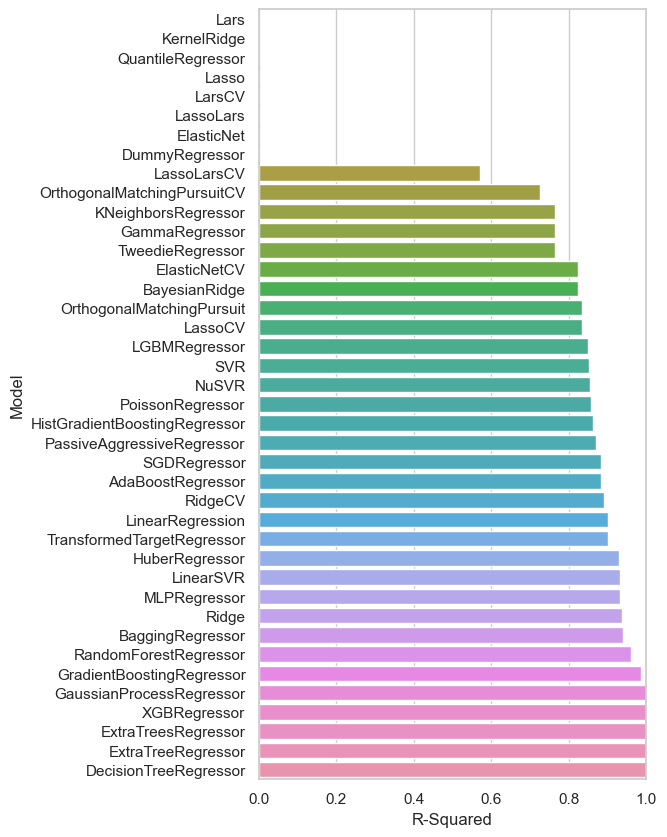

In [77]:

# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

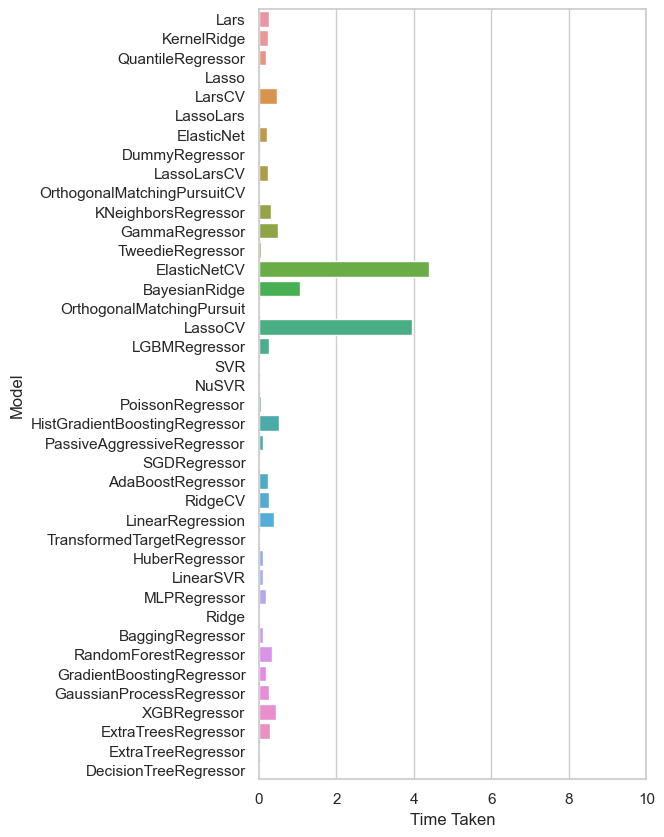

In [78]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))
     

[(0.0, 10.0)]

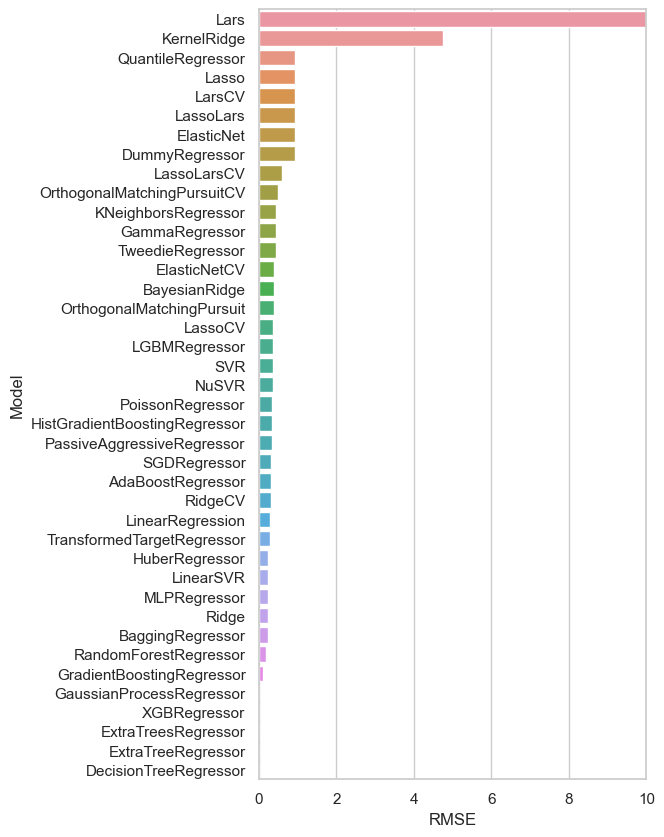

In [79]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))